# Dev notebook - AS


## Load and process

In [1]:
%matplotlib widget
import time
import numpy as np
from aeromaps.core.process import create_process
from aeromaps.core.models import models_complex
from aeromaps.models.air_transport.aircraft_fleet_and_operations.fleet.fleet_model import (
    Fleet,
    AircraftParameters,
    Aircraft,
)

In [2]:
process = create_process(
    models=models_complex,
    use_fleet_model=True,
    add_examples_aircraft_and_subcategory=False,
)

## Set up variables

### Aviation scenario

In [3]:
# Air traffic evolution

## Growth rate by category [%]
process.parameters.cagr_passenger_short_range_reference_periods = []
process.parameters.cagr_passenger_short_range_reference_periods_values = [4.0]
process.parameters.cagr_passenger_medium_range_reference_periods = []
process.parameters.cagr_passenger_medium_range_reference_periods_values = [4.0]
process.parameters.cagr_passenger_long_range_reference_periods = []
process.parameters.cagr_passenger_long_range_reference_periods_values = [4.0]
process.parameters.cagr_freight_reference_periods = []
process.parameters.cagr_freight_reference_periods_values = [4.0]

In [4]:
# Aircraft fleet

## Initialization
fleet = process.fleet

## Short Range
short_range_aircraft_params = AircraftParameters(
    entry_into_service_year=2035,
    consumption_evolution=10.0,
    nox_evolution=-75.0,
    soot_evolution=-100.0,
    doc_non_energy_evolution=20.0,
    cruise_altitude=12000.0,
    ask_year=406000000,
    rc_cost=60000000,
    nrc_cost=10000000000.0,
)
short_range_aircraft = Aircraft(
    "New Short-range Aircraft", parameters=short_range_aircraft_params, energy_type="HYDROGEN"
)
fleet.categories["Short Range"].subcategories[0].add_aircraft(aircraft=short_range_aircraft)

## Medium Range
medium_range_aircraft_params = AircraftParameters(
    entry_into_service_year=2035,
    consumption_evolution=-20.0,
    nox_evolution=0.0,
    soot_evolution=0.0,
    doc_non_energy_evolution=-5.0,
    cruise_altitude=12000.0,
    ask_year=406000000.0,
    rc_cost=80000000.0,
    nrc_cost=10000000000.0,
)
medium_range_aircraft = Aircraft(
    "New Medium-range Aircraft", parameters=medium_range_aircraft_params, energy_type="DROP_IN_FUEL"
)
fleet.categories["Medium Range"].subcategories[0].add_aircraft(aircraft=medium_range_aircraft)

## Long Range
long_range_aircraft_params = AircraftParameters(
    entry_into_service_year=2022,
    consumption_evolution=-10.0,
    nox_evolution=0.0,
    soot_evolution=0.0,
    doc_non_energy_evolution=-10.0,
    cruise_altitude=12000.0,
    ask_year=406000000.0,
    rc_cost=150000000.0,
    nrc_cost=25000000000.0,
)
long_range_aircraft = Aircraft(
    "New Long-range Aircraft", parameters=long_range_aircraft_params, energy_type="DROP_IN_FUEL"
)
fleet.categories["Long Range"].subcategories[0].add_aircraft(aircraft=long_range_aircraft)


## Long Range
long_range_aircraft_params = AircraftParameters(
    entry_into_service_year=2024,
    consumption_evolution=-20.0,
    nox_evolution=0.0,
    soot_evolution=0.0,
    doc_non_energy_evolution=-30.0,
    cruise_altitude=12000.0,
    ask_year=406000000.0,
    rc_cost=150000000.0,
    nrc_cost=25000000000.0,
)
long_range_aircraft = Aircraft(
    "New Long-range Aircraft 2", parameters=long_range_aircraft_params, energy_type="DROP_IN_FUEL"
)
fleet.categories["Long Range"].subcategories[0].add_aircraft(aircraft=long_range_aircraft)


## Long Range
long_range_aircraft_params = AircraftParameters(
    entry_into_service_year=2029,
    consumption_evolution=-25.0,
    nox_evolution=0.0,
    soot_evolution=0.0,
    doc_non_energy_evolution=+10.0,
    cruise_altitude=12000.0,
    ask_year=406000000.0,
    rc_cost=150000000.0,
    nrc_cost=25000000000.0,
)
long_range_aircraft = Aircraft(
    "New Long-range Aircraft 3", parameters=long_range_aircraft_params, energy_type="DROP_IN_FUEL"
)
fleet.categories["Long Range"].subcategories[0].add_aircraft(aircraft=long_range_aircraft)


## Fleet renewal
fleet.categories["Short Range"].parameters.life = 25
fleet.categories["Medium Range"].parameters.life = 25
fleet.categories["Long Range"].parameters.life = 25

In [5]:
# Aircraft fleet and operation evolution - Aircraft load factor

## Aircraft load factor in 2050 [%]
process.parameters.load_factor_end_year = 89  # 2019 value: 82.399312

In [6]:
# Aircraft fleet and operation evolution - Operations

## Values for setting the logistic function
process.parameters.operations_final_gain = 8.0  # [%]
process.parameters.operations_start_year = 2025
process.parameters.operations_duration = 25.0

In [7]:
# Aircraft energy - Introduction of alternative drop-in fuels

## Share of alternative fuels in the drop-in fuel mix (the rest being supplemented by kerosene) [%]
process.parameters.biofuel_share_reference_years = [2020, 2030, 2040, 2050]
process.parameters.biofuel_share_reference_years_values = [0.0, 4.8, 24.0, 35.0]
process.parameters.electrofuel_share_reference_years = [2020, 2030, 2040, 2050]
process.parameters.electrofuel_share_reference_years_values = [0.0, 1.2, 10.0, 35.0]

In [8]:
# Various environmental settings

## Share of biofuel production pathways (the rest being completed by AtJ processes) [%]
process.parameters.biofuel_hefa_fog_share_reference_years = [2020, 2030, 2040, 2050]
process.parameters.biofuel_hefa_fog_share_reference_years_values = [100, 0.7, 0.7, 0.7]
process.parameters.biofuel_hefa_others_share_reference_years = [2020, 2030, 2040, 2050]
process.parameters.biofuel_hefa_others_share_reference_years_values = [0.0, 3.8, 3.8, 3.8]
process.parameters.biofuel_ft_others_share_reference_years = [2020, 2030, 2040, 2050]
process.parameters.biofuel_ft_others_share_reference_years_values = [0.0, 76.3, 76.3, 76.3]
process.parameters.biofuel_ft_msw_share_reference_years = [2020, 2030, 2040, 2050]
process.parameters.biofuel_ft_msw_share_reference_years_values = [0.0, 7.4, 7.4, 7.4]

## Emission factors for electricity (2019 value: 429 gCO2/kWh)
process.parameters.electricity_emission_factor_reference_years = [2020, 2030, 2040, 2050]
process.parameters.electricity_emission_factor_reference_years_values = [429.0, 180.0, 75.0, 30.0]

## Share of hydrogen production pathways (the rest being completed by production via coal without CCS) [%]
## Distribution in 2019: Gas without CCS (71%), Coal without CCS (27%), Electrolysis (2%), Others with CCS (0%), Co-products not taken into account
process.parameters.hydrogen_electrolysis_share_reference_years = [2020, 2030, 2040, 2050]
process.parameters.hydrogen_electrolysis_share_reference_years_values = [2, 50, 100, 100]
process.parameters.hydrogen_gas_ccs_share_reference_years = [2020, 2030, 2040, 2050]
process.parameters.hydrogen_gas_ccs_share_reference_years_values = [3, 10, 0, 0]
process.parameters.hydrogen_coal_ccs_share_reference_years = [2020, 2030, 2040, 2050]
process.parameters.hydrogen_coal_ccs_share_reference_years_values = [5, 10, 0, 0]
process.parameters.hydrogen_gas_share_reference_years = [2020, 2030, 2040, 2050]
process.parameters.hydrogen_gas_share_reference_years_values = [30, 20, 0, 0]

In [9]:
# Cost parameters

## Carbon tax
process.parameters.carbon_tax_reference_years = [2020, 2030, 2040, 2050]
process.parameters.carbon_tax_reference_years_values = [
    5,
    250,
    500,
    775,
]  # 2020 value differs from the value of Quinet (54 €/tCO2)

### Sustainability assessment

In [10]:
# Environmental limits

## Carbon budgets and Carbon Dioxide Removal [GtCO2]
process.parameters.net_carbon_budget = 850.0
process.parameters.carbon_dioxyde_removal_2100 = 285.0

## Available energy resources in 2050 [EJ]
process.parameters.waste_biomass = 12
process.parameters.crops_biomass = 63
process.parameters.forest_residues_biomass = 17
process.parameters.agricultural_residues_biomass = 57
process.parameters.algae_biomass = 15
process.parameters.available_electricity = 200.0

In [11]:
# Allocation settings

## Aviation share of the global (equivalent) carbon budget [%]
process.parameters.aviation_carbon_budget_allocated_share = 2.6
process.parameters.aviation_equivalentcarbonbudget_allocated_share = 5.1

## Aviation share of the global energy resources (biomass and electricity) [%]
process.parameters.aviation_biomass_allocated_share = 5.0
process.parameters.aviation_electricity_allocated_share = 5.0

## Compute

In [12]:
process.compute()

2000    2.103581
2001    2.549179
2002    1.253461
2003    0.614974
2004    0.193250
2005    0.335510
2006   -0.136510
2007   -0.320584
2008   -0.337184
2009   -0.032680
2010   -1.113020
2011   -0.930350
2012   -0.762214
2013   -0.586757
2014   -0.712633
2015   -0.394540
2016   -0.271634
2017   -0.472590
2018   -0.342169
2019    0.000000
2020    2.584584
2021   -0.605433
2022   -0.768523
2023   -0.925757
2024   -1.079698
2025   -1.217228
2026   -1.339295
2027   -1.445217
2028   -1.536059
2029   -1.616586
2030   -1.685477
2031   -1.747512
2032   -1.805249
2033   -1.860594
2034   -1.914651
2035   -1.979513
2036   -2.035843
2037   -2.091791
2038   -2.147069
2039   -2.201663
2040   -2.255973
2041   -2.310824
2042   -2.367374
2043   -2.426950
2044   -2.490816
2045   -2.559881
2046   -2.634349
2047   -2.713426
2048   -2.795221
2049   -2.876945
2050   -2.955424
dtype: float64


In [13]:
process.vector_outputs_df.operations_specific_abatement_cost

2000         NaN
2001         NaN
2002         NaN
2003         NaN
2004         NaN
2005         NaN
2006         NaN
2007         NaN
2008         NaN
2009         NaN
2010         NaN
2011         NaN
2012         NaN
2013         NaN
2014         NaN
2015         NaN
2016         NaN
2017         NaN
2018         NaN
2019         NaN
2020         NaN
2021         NaN
2022         NaN
2023         NaN
2024         NaN
2025   -94.20893
2026   -94.20893
2027   -94.20893
2028   -94.20893
2029   -94.20893
2030   -94.20893
2031   -94.20893
2032   -94.20893
2033   -94.20893
2034   -94.20893
2035   -94.20893
2036   -94.20893
2037   -94.20893
2038   -94.20893
2039   -94.20893
2040   -94.20893
2041   -94.20893
2042   -94.20893
2043   -94.20893
2044   -94.20893
2045   -94.20893
2046   -94.20893
2047   -94.20893
2048   -94.20893
2049   -94.20893
2050   -94.20893
Name: operations_specific_abatement_cost, dtype: float64

In [14]:
process.vector_outputs_df["h2_avg_cost_per_kg"]

2000         NaN
2001         NaN
2002         NaN
2003         NaN
2004         NaN
2005         NaN
2006         NaN
2007         NaN
2008         NaN
2009         NaN
2010         NaN
2011         NaN
2012         NaN
2013         NaN
2014         NaN
2015         NaN
2016         NaN
2017         NaN
2018         NaN
2019         NaN
2020         NaN
2021         NaN
2022         NaN
2023         NaN
2024         NaN
2025         NaN
2026         NaN
2027         NaN
2028         NaN
2029         NaN
2030         NaN
2031         NaN
2032         NaN
2033         NaN
2034         NaN
2035    8.971943
2036    9.171367
2037    9.370740
2038    9.570132
2039    9.769594
2040    9.969164
2041    9.967652
2042    9.966056
2043    9.964416
2044    9.962765
2045    9.961443
2046    9.960365
2047    9.959470
2048    9.958714
2049    9.958066
2050    9.957505
Name: h2_avg_cost_per_kg, dtype: float64

## Results

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches


social_discount_rate = 0.03
start_year = 2020
end_year = 2050


macc_dict = {}

name_list = []
cumvol_list = []
cumcost_list = []
discounted_cumcost_list = []
undiscounted_cac_list = []
discounted_cac_list = []

colors_list = []

for category, sets in process.fleet_model.all_aircraft_elements.items():
    for aircraft_var in sets:
        if hasattr(aircraft_var, "parameters"):
            aircraft_var_name = aircraft_var.parameters.full_name
        else:
            aircraft_var_name = aircraft_var.full_name

        cumvol = 0
        cumcost = 0
        discountedcumcost = 0
        for year in range(start_year, end_year + 1):
            year_vol = (
                process.fleet_model.df.loc[
                    year, aircraft_var_name + ":aircraft_carbon_abatement_volume"
                ]
                / 1000000
            )

            year_cost = (
                year_vol
                * 1000000
                * process.fleet_model.df.loc[
                    year, aircraft_var_name + ":aircraft_carbon_abatement_cost"
                ]
            )

            cumvol += year_vol
            cumcost += year_cost
            discountedcumcost += year_cost / (1 + social_discount_rate) ** (year - start_year)
        cumvol_list.append(cumvol)
        cumcost_list.append(cumcost)
        discounted_cumcost_list.append(discountedcumcost)

        if category == "Short Range":
            colors_list.append("gold")
        elif category == "Medium Range":
            colors_list.append("goldenrod")
        else:
            colors_list.append("darkgoldenrod")
        name_list.append(aircraft_var_name.split(":")[-1])

name_list.extend(
    [
        el
        for el in [
            "Bio - HEFA FOG",
            "Bio - HEFA Others",
            "Bio - Alcohol to Jet",
            "Bio - FT MSW",
            "Bio - FT Others",
            "H2C",
            "H2CCCS",
            "H2G",
            "H2GCCS",
            "H2E",
            "Electrofuel",
            "OPS",
            "LF",
        ]
    ]
)


# Abatement effective in MtCO2e
cumvol_list.extend(
    [
        elt / 1000000
        for elt in [
            process.vector_outputs_df.abatement_effective_hefa_fog.loc[start_year:end_year].sum(),
            process.vector_outputs_df.abatement_effective_hefa_others.loc[
                start_year:end_year
            ].sum(),
            process.vector_outputs_df.abatement_effective_atj.loc[start_year:end_year].sum(),
            process.vector_outputs_df.abatement_effective_ft_msw.loc[start_year:end_year].sum(),
            process.vector_outputs_df.abatement_effective_ft_others.loc[start_year:end_year].sum(),
            process.vector_outputs_df.abatement_effective_hydrogen_coal.loc[
                start_year:end_year
            ].sum(),
            process.vector_outputs_df.abatement_effective_hydrogen_coal_ccs.loc[
                start_year:end_year
            ].sum(),
            process.vector_outputs_df.abatement_effective_hydrogen_gas.loc[
                start_year:end_year
            ].sum(),
            process.vector_outputs_df.abatement_effective_hydrogen_gas_ccs.loc[
                start_year:end_year
            ].sum(),
            process.vector_outputs_df.abatement_effective_hydrogen_electrolysis.loc[
                start_year:end_year
            ].sum(),
            process.vector_outputs_df.abatement_effective_electrofuel.loc[
                start_year:end_year
            ].sum(),
            process.vector_outputs_df.operations_abatement_effective.loc[start_year:end_year].sum(),
            process.vector_outputs_df.load_factor_abatement_effective.loc[
                start_year:end_year
            ].sum(),
        ]
    ]
)

# carbon abatement cost in (€/tCO2e)
cumcost_list.extend(
    [
        el
        for el in [
            (
                process.vector_outputs_df.carbon_abatement_cost_hefa_fog.loc[start_year:end_year]
                * process.vector_outputs_df.abatement_effective_hefa_fog.loc[start_year:end_year]
            ).sum(),
            (
                process.vector_outputs_df.carbon_abatement_cost_hefa_others.loc[start_year:end_year]
                * process.vector_outputs_df.abatement_effective_hefa_others.loc[start_year:end_year]
            ).sum(),
            (
                process.vector_outputs_df.carbon_abatement_cost_atj.loc[start_year:end_year]
                * process.vector_outputs_df.abatement_effective_atj.loc[start_year:end_year]
            ).sum(),
            (
                process.vector_outputs_df.carbon_abatement_cost_ft_msw.loc[start_year:end_year]
                * process.vector_outputs_df.abatement_effective_ft_msw.loc[start_year:end_year]
            ).sum(),
            (
                process.vector_outputs_df.carbon_abatement_cost_ft_others.loc[start_year:end_year]
                * process.vector_outputs_df.abatement_effective_ft_others.loc[start_year:end_year]
            ).sum(),
            (
                process.vector_outputs_df.carbon_abatement_cost_h2_coal.loc[start_year:end_year]
                * process.vector_outputs_df.abatement_effective_hydrogen_coal.loc[
                    start_year:end_year
                ]
            ).sum(),
            (
                process.vector_outputs_df.carbon_abatement_cost_h2_coal_ccs.loc[start_year:end_year]
                * process.vector_outputs_df.abatement_effective_hydrogen_coal_ccs.loc[
                    start_year:end_year
                ]
            ).sum(),
            (
                process.vector_outputs_df.carbon_abatement_cost_h2_gas.loc[start_year:end_year]
                * process.vector_outputs_df.abatement_effective_hydrogen_gas.loc[
                    start_year:end_year
                ]
            ).sum(),
            (
                process.vector_outputs_df.carbon_abatement_cost_h2_gas_ccs.loc[start_year:end_year]
                * process.vector_outputs_df.abatement_effective_hydrogen_gas_ccs.loc[
                    start_year:end_year
                ]
            ).sum(),
            (
                process.vector_outputs_df.carbon_abatement_cost_h2_electrolysis.loc[
                    start_year:end_year
                ]
                * process.vector_outputs_df.abatement_effective_hydrogen_electrolysis.loc[
                    start_year:end_year
                ]
            ).sum(),
            (
                process.vector_outputs_df.carbon_abatement_cost_electrofuel.loc[start_year:end_year]
                * process.vector_outputs_df.abatement_effective_electrofuel.loc[start_year:end_year]
            ).sum(),
            (
                process.vector_outputs_df.operations_abatement_cost.loc[start_year:end_year]
                * process.vector_outputs_df.operations_abatement_effective.loc[start_year:end_year]
            ).sum(),
            (
                process.vector_outputs_df.load_factor_abatement_cost.loc[start_year:end_year]
                * process.vector_outputs_df.load_factor_abatement_effective.loc[start_year:end_year]
            ).sum(),
        ]
    ]
)

power_series = pd.Series(
    [(1 + social_discount_rate) ** (year - start_year) for year in range(start_year, end_year + 1)],
    index=range(start_year, end_year + 1),
)

discounted_cumcost_list.extend(
    [
        el
        for el in [
            (
                process.vector_outputs_df.carbon_abatement_cost_hefa_fog.loc[start_year:end_year]
                * process.vector_outputs_df.abatement_effective_hefa_fog.loc[start_year:end_year]
                / power_series
            ).sum(),
            (
                process.vector_outputs_df.carbon_abatement_cost_hefa_others.loc[start_year:end_year]
                * process.vector_outputs_df.abatement_effective_hefa_others.loc[start_year:end_year]
                / power_series
            ).sum(),
            (
                process.vector_outputs_df.carbon_abatement_cost_atj.loc[start_year:end_year]
                * process.vector_outputs_df.abatement_effective_atj.loc[start_year:end_year]
                / power_series
            ).sum(),
            (
                process.vector_outputs_df.carbon_abatement_cost_ft_msw.loc[start_year:end_year]
                * process.vector_outputs_df.abatement_effective_ft_msw.loc[start_year:end_year]
                / power_series
            ).sum(),
            (
                process.vector_outputs_df.carbon_abatement_cost_ft_others.loc[start_year:end_year]
                * process.vector_outputs_df.abatement_effective_ft_others.loc[start_year:end_year]
                / power_series
            ).sum(),
            (
                process.vector_outputs_df.carbon_abatement_cost_h2_coal.loc[start_year:end_year]
                * process.vector_outputs_df.abatement_effective_hydrogen_coal.loc[
                    start_year:end_year
                ]
                / power_series
            ).sum(),
            (
                process.vector_outputs_df.carbon_abatement_cost_h2_coal_ccs.loc[start_year:end_year]
                * process.vector_outputs_df.abatement_effective_hydrogen_coal_ccs.loc[
                    start_year:end_year
                ]
                / power_series
            ).sum(),
            (
                process.vector_outputs_df.carbon_abatement_cost_h2_gas.loc[start_year:end_year]
                * process.vector_outputs_df.abatement_effective_hydrogen_gas.loc[
                    start_year:end_year
                ]
                / power_series
            ).sum(),
            (
                process.vector_outputs_df.carbon_abatement_cost_h2_gas_ccs.loc[start_year:end_year]
                * process.vector_outputs_df.abatement_effective_hydrogen_gas_ccs.loc[
                    start_year:end_year
                ]
                / power_series
            ).sum(),
            (
                process.vector_outputs_df.carbon_abatement_cost_h2_electrolysis.loc[
                    start_year:end_year
                ]
                * process.vector_outputs_df.abatement_effective_hydrogen_electrolysis.loc[
                    start_year:end_year
                ]
                / power_series
            ).sum(),
            (
                process.vector_outputs_df.carbon_abatement_cost_electrofuel.loc[start_year:end_year]
                * process.vector_outputs_df.abatement_effective_electrofuel.loc[start_year:end_year]
                / power_series
            ).sum(),
            (
                process.vector_outputs_df.operations_abatement_cost.loc[start_year:end_year]
                * process.vector_outputs_df.operations_abatement_effective.loc[start_year:end_year]
                / power_series
            ).sum(),
            (
                process.vector_outputs_df.load_factor_abatement_cost.loc[start_year:end_year]
                * process.vector_outputs_df.load_factor_abatement_effective.loc[start_year:end_year]
                / power_series
            ).sum(),
        ]
    ]
)


colors_list.extend(
    [
        el
        for el in [
            "yellowgreen",
            "yellowgreen",
            "yellowgreen",
            "yellowgreen",
            "yellowgreen",
            "yellowgreen",
            "yellowgreen",
            "yellowgreen",
            "yellowgreen",
            "yellowgreen",
            "yellowgreen",
            "orange",
            "orange",
        ]
    ]
)


undiscounted_cac_list = [a / (b * 1000000) for a, b in zip(cumcost_list, cumvol_list)]
discounted_cac_list = [a / (b * 1000000) for a, b in zip(discounted_cumcost_list, cumvol_list)]


macc_df = pd.DataFrame(
    data=[
        cumvol_list,
        cumcost_list,
        discounted_cumcost_list,
        undiscounted_cac_list,
        discounted_cac_list,
        colors_list,
    ],
    columns=name_list,
    index=[
        "abatement_effective",
        "cumulative_abatement_cost",
        "discoutend_cumulative_abatement_cost",
        "undiscounted_carbon_abatement_cost",
        "carbon_abatement_cost",
        "colors",
    ],
)
macc_df = macc_df.transpose().sort_values(by="carbon_abatement_cost")

In [16]:
macc_df

,abatement_effective,cumulative_abatement_cost,discoutend_cumulative_abatement_cost,undiscounted_carbon_abatement_cost,carbon_abatement_cost,colors
H2G,-0.564051,1883668692.188784,1143942870.012683,-3339.533943,-2028.082783,yellowgreen
H2C,-2.569845,1068684462.723663,649001116.182652,-415.855666,-252.544882,yellowgreen
New Long-range Aircraft 2,1202.155003,-398872345157.325867,-225585561791.98642,-331.797767,-187.650978,darkgoldenrod
New Long-range Aircraft,339.933496,-73506987793.155777,-45608377866.887085,-216.239319,-134.168531,darkgoldenrod
old_reference,-39.980962,5250139077.905613,4883445150.561286,-131.315978,-122.144265,goldenrod
old_reference,-60.911449,7998646568.490376,7294942052.68583,-131.315978,-119.763068,darkgoldenrod
old_reference,-52.236542,6859492652.092423,6169374199.333357,-131.315978,-118.104567,gold
recent_reference,1071.46842,-140700923772.933838,-101834031579.835434,-131.315978,-95.041561,darkgoldenrod
New Medium-range Aircraft,1085.457602,-192766165346.136963,-87846295872.545685,-177.589769,-80.930195,goldenrod
recent_reference,1958.201739,-257143177051.791748,-158182497035.57074,-131.315978,-80.779469,gold


3D steplot => mouais

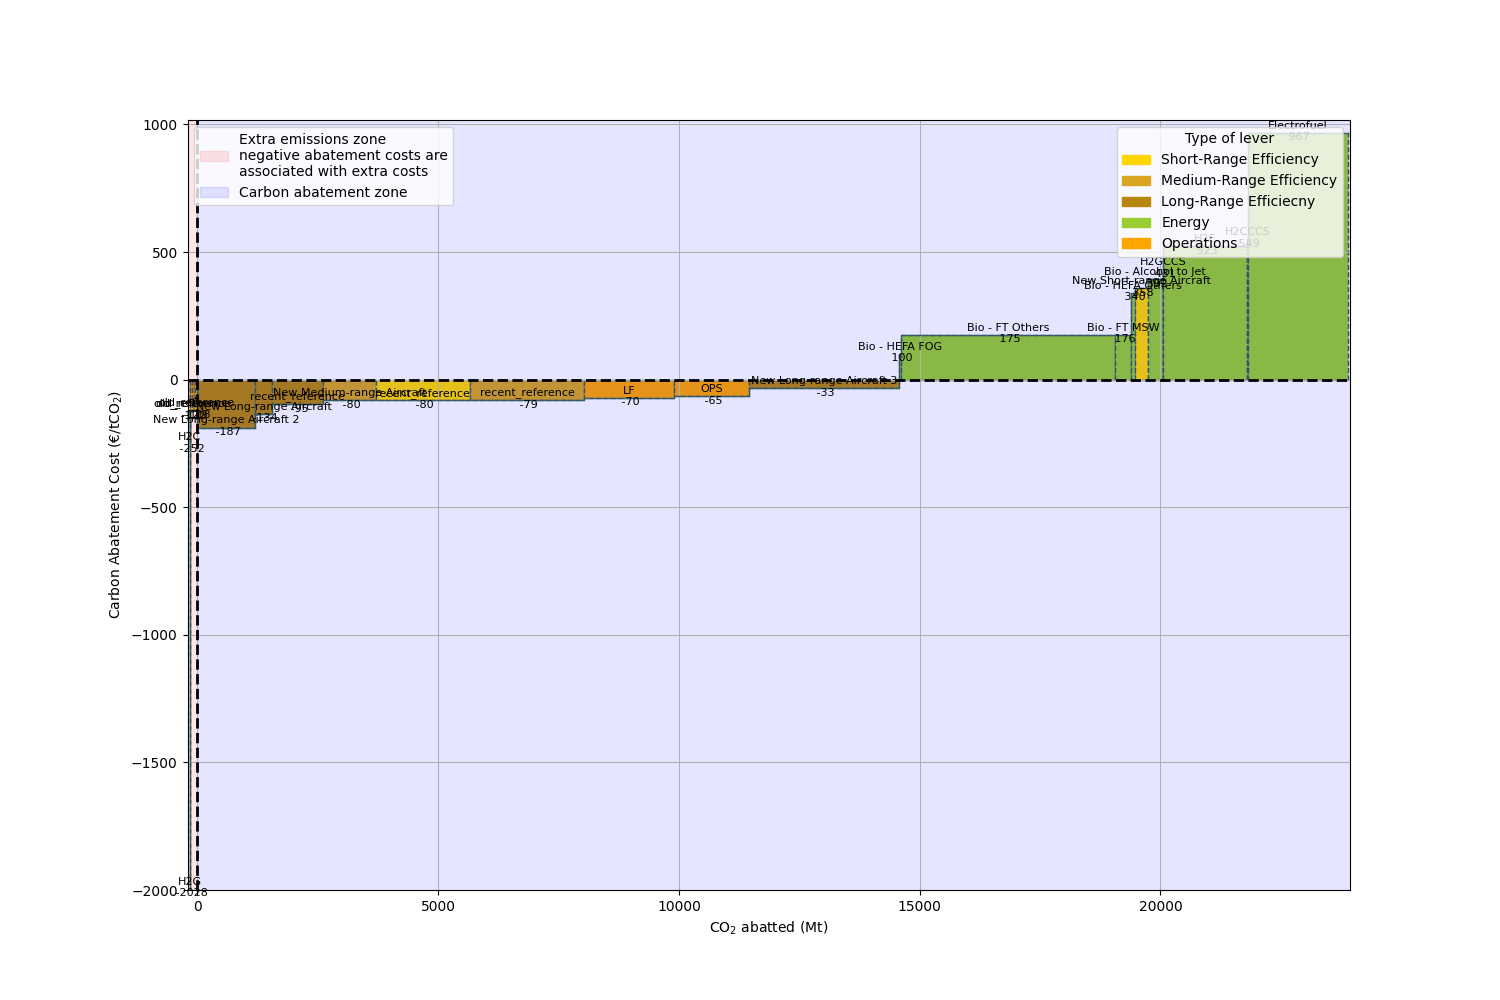

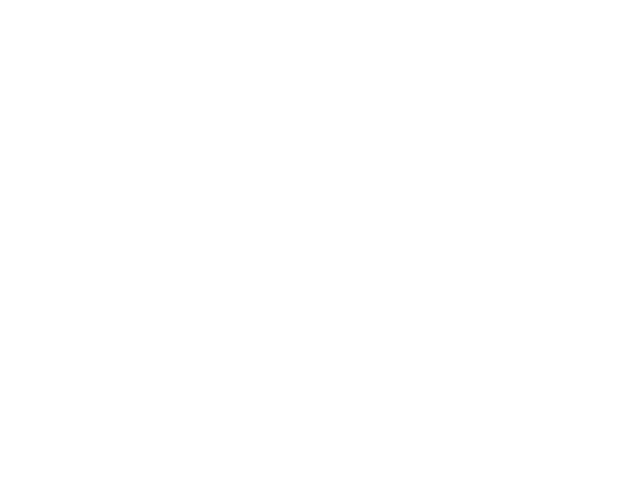

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches


plt.clf()
fig, ax = plt.subplots(figsize=(15, 10))


maccneg_df = macc_df[macc_df["abatement_effective"] < 0]
maccpos_df = macc_df[macc_df["abatement_effective"] > 0]

##### POS ######

heights_pos = maccpos_df["carbon_abatement_cost"].to_list()
names_pos = maccpos_df.index.to_list()
heights_pos.insert(0, 0)
heights_pos.append(heights_pos[-1])

# # MAx effective maccpos
widths_effective_pos = maccpos_df["abatement_effective"].to_list()
widths_effective_pos.insert(0, 0)
widths_effective_pos.append(widths_effective_pos[-1])

colors_pos = maccpos_df["colors"].to_list()

maccpos_curve = ax.step(
    np.cumsum(widths_effective_pos) - widths_effective_pos,
    heights_pos,
    where="post",
    color="#335C67",
    label="Marginal abatement cost",
    linewidth=1,
)

for i in range(len(widths_effective_pos) - 2):
    x_position = (np.cumsum(widths_effective_pos)[i] + np.cumsum(widths_effective_pos)[i + 1]) / 2
    y_position = min(2000 - 10, heights_pos[i + 1] + 5)
    ax.text(
        x_position,
        y_position,
        f"{names_pos[i]}\n {int(heights_pos[i + 1])}",
        rotation=0,
        size=8,
        ha="center",
        va="center",
    )

# Fill under the step plot with different colors for each step
for i in range(0, (len(widths_effective_pos) - 2)):
    # Create a polygon for each step
    polygon = plt.Polygon(
        [
            (np.cumsum(widths_effective_pos)[i], 0),
            (np.cumsum(widths_effective_pos)[i], heights_pos[i + 1]),
            (np.cumsum(widths_effective_pos)[i + 1], heights_pos[i + 1]),
            (np.cumsum(widths_effective_pos)[i + 1], 0),
        ],
        closed=True,
        alpha=1,
        facecolor=colors_pos[i],
        edgecolor="#335C67",
        linewidth=1,
        linestyle="--",
    )
    ax.add_patch(polygon)

##### NEG #####

heights_neg = maccneg_df["carbon_abatement_cost"].to_list()
names_neg = maccneg_df.index.to_list()

heights_neg.append(0)
heights_neg.insert(0, heights_neg[0])

# # MAx effective maccneg
widths_effective_neg = maccneg_df["abatement_effective"].to_list()

widths_effective_neg.insert(0, 0)
widths_effective_neg.append(0)

colors_neg = maccneg_df["colors"].to_list()

maccneg_curve = ax.step(
    np.cumsum(widths_effective_neg)[-1] - np.cumsum(widths_effective_neg) + widths_effective_neg,
    heights_neg,
    where="post",
    color="#335C67",
    label="Marginal emission cost",
    linewidth=1,
)

for i in range(len(widths_effective_neg) - 2):
    x_position = (
        np.cumsum(widths_effective_neg)[-1]
        - (np.cumsum(widths_effective_neg)[i] + np.cumsum(widths_effective_neg)[i + 1]) / 2
    )
    y_position = max(-2000 + 10, heights_neg[i + 1] + 5)
    ax.text(
        x_position,
        y_position,
        f"{names_neg[i]}\n {int(heights_neg[i + 1])}",
        rotation=0,
        size=8,
        ha="center",
        va="center",
    )


# Fill under the step plot with different colors for each step
for i in range(0, (len(widths_effective_neg) - 2)):
    # Create a polygon for each step
    polygon = plt.Polygon(
        [
            (np.cumsum(widths_effective_neg)[-1] - np.cumsum(widths_effective_neg)[i], 0),
            (
                np.cumsum(widths_effective_neg)[-1] - np.cumsum(widths_effective_neg)[i],
                heights_neg[i + 1],
            ),
            (
                np.cumsum(widths_effective_neg)[-1] - np.cumsum(widths_effective_neg)[i + 1],
                heights_neg[i + 1],
            ),
            (np.cumsum(widths_effective_neg)[-1] - np.cumsum(widths_effective_neg)[i + 1], 0),
        ],
        closed=True,
        alpha=1,
        facecolor=colors_neg[i],
        edgecolor="#335C67",
        linewidth=1,
        linestyle="--",
    )
    ax.add_patch(polygon)

ax.set_ylabel("Carbon Abatement Cost (€/t$\mathregular{CO_2}$)")
ax.set_xlabel("$\mathregular{CO_2}$ abatted (Mt)")

ax.axhline(0, color="black", linestyle="--", linewidth=2)

ax.axvline(0, color="black", linestyle="--", linewidth=2)

legend_patches_1 = [
    mpatches.Patch(color="gold", alpha=1, label="Short-Range Efficiency"),
    mpatches.Patch(color="goldenrod", alpha=1, label="Medium-Range Efficiency"),
    mpatches.Patch(color="darkgoldenrod", alpha=1, label="Long-Range Efficiecny"),
    mpatches.Patch(color="yellowgreen", alpha=1, label="Energy"),
    mpatches.Patch(color="orange", alpha=1, label="Operations"),
]

ax.add_artist(ax.legend(handles=legend_patches_1, title="Type of lever", loc="upper right"))

ax.set_xlim(
    np.cumsum(widths_effective_neg)[-1] - 50,
    np.cumsum(widths_effective_pos)[len(widths_effective_pos) - 2] + 50,
)

ax.axvspan(xmin=ax.get_xlim()[0], xmax=0, facecolor="red", alpha=0.1, clip_on=True)
ax.axvspan(xmin=0, xmax=ax.get_xlim()[1], facecolor="blue", alpha=0.1, clip_on=True)

legend_patches = [
    mpatches.Patch(
        color="red",
        alpha=0.1,
        label="Extra emissions zone\nnegative abatement costs are\nassociated with extra costs",
    ),
    mpatches.Patch(color="blue", alpha=0.1, label="Carbon abatement zone"),
]
ax.set_ylim(
    max(-2000, min(min(heights_pos), min(heights_neg)) - 50),
    min(2000, max(max(heights_neg), max(heights_pos)) + 50),
)

ax.legend(handles=legend_patches, loc="upper left")

ax.grid()
plt.show()

In [18]:
process.float_inputs_df[process.float_inputs_df.Name=='social_discount_rate']

,Name,Value
167,social_discount_rate,0.03


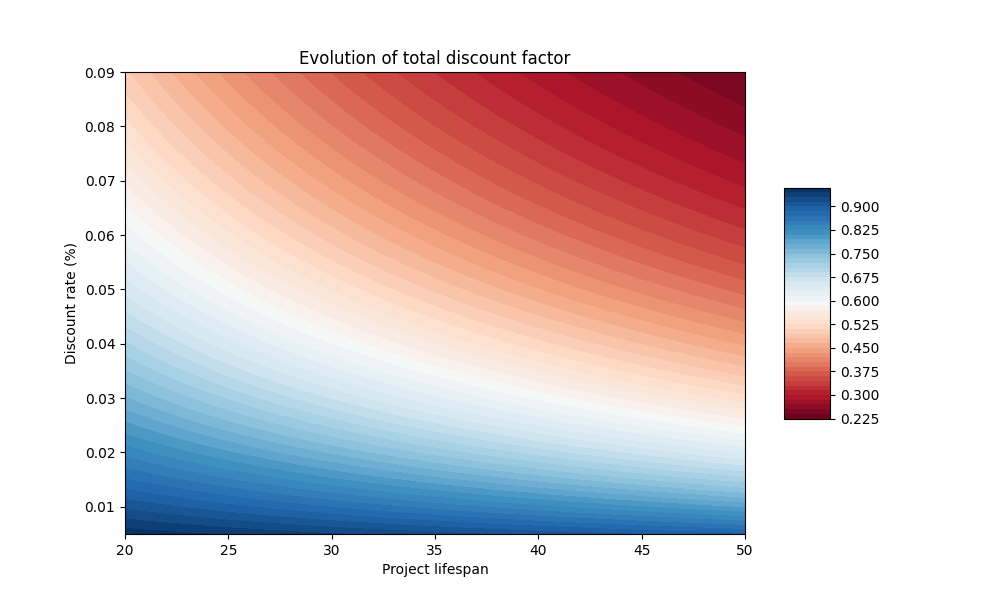

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Define the range of n and r values
n_values = np.linspace(20, 50, 100)
r_values = np.linspace(0.005, 0.09, 100)

# Create a meshgrid from n and r values
N, R = np.meshgrid(n_values, r_values)

# Calculate the expression
expression = (1 - (1 / (1 + R)) ** N) / (1 - (1 / (1 + R))) / N

# Plot the surface
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

surf = ax.contourf(N, R, expression, 50, cmap="RdBu")
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

ax.set_xlabel("Project lifespan")
ax.set_ylabel("Discount rate (%)")


plt.title("Evolution of total discount factor")
plt.show()